# 🔻 [Return to workflow](#leftoff)

# 🏡 **AirBNB Dataset Review** 🏨

# ❌ Update target audience and guiding questions

**Who?**
>* 🏢 **AirBNB Corporate** interested in maximizing customer satisfaction to increase repeat guests and encourage new guests to stay with AirBNB hosts
>
>
>* **AirBNB hosts** interested in maximizing the ratings

**Why?**
>* 💰 **Revenue Management:** 
>
>
>
>* 🤝 **Sales:**
>
>
>
>* 🛌 **Rooms Ops:**
>
>
>
>* 🍰 ☕ **Food and Beverage:**
>
>
>

**What?**
>* 🧾 Dataset comprised of... 
>  * 32 different features
>  * Nearly 120,000 reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods? 
>* Data prep and feature engineering

# 🎯  **Goal:**

Determining whether or not a host location would receive a score greater than or equal to 4/5 (defined by `'review_scores_rating'`).

# 📌 **To-Do**

---

- [ ] [TD1](#td1)
- [ ] [TD2](#td2)
- [ ] [TD3](#td3)
- [ ] [todo4](#td4)
- [ ] [todo5](#td5)
- [ ] [todo6](#td6)
- [ ] [todo7](#td7)

---

# 📂 **Imports and Settings**

In [111]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import missingno

## Modeling - SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn import set_config
set_config(display='diagram')

# from sklearn.naive_bayes import MultinomialNB # for naive bayes model

## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

In [112]:
## Personal functions
import clf_functions.functions as cf
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
## Controlling whether or not to show visualizations
show_visualizations = False

## ❓ FSDS

In [114]:
# import fsds as fs

In [115]:
# fs.ihelp_menu([fs.ihelp_menu, sort_report])

# 📖 **Read Data**

In [116]:
## Reading data and saving to a DataFrame

source = 'http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/listings.csv.gz'

data = pd.read_csv(source)

In [117]:
## Inspecting imported dataset
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [118]:
## Checking number of rows and columns
data.shape

(8033, 74)

---

> The initial read of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I need to get a better idea of the statistics for the dataset, especially any missing values and the datatypes for each column. I need to pre-process this data before I can perform any modeling.

---

# 👨‍💻 **Interactive Investigation**

---

> To increase accessibility to the data, **I include a widget to allow the user to sort through the data interactively.** I use [**Jupyter Widgets**](https://ipywidgets.readthedocs.io/en/latest/index.html) to create this interactive report.
>
>**To use:** select which column by which you would like to sort from the dropdown menu, then click the "Run Interact" button.
>
>***Note about 'Drop_Cols' and Cols:*** these keyword arguments are used to allow the user to drop specific columns.
>
> **Only click the "Drop_Cols" option when specifying "Cols"!** Otherwise it will cause an error.
>
>The 'Cols' dropdown menu does not affect the resulting report; the data is filtered from the report prior to displaying the results. 
>
>I chose to include this option for flexibility and adaptability, but it does have the unintended consequence of creating another drop-down menu. Please ignore this menu, as it does not provide any additional functionality. For future work, I will disable the menu to prevent confusion.

---

In [119]:
## Running report on unfiltered dataset

interact_manual(cf.sort_report, Sort_by=list(cf.report_df(data).columns),
                Source=source);

interactive(children=(Text(value='http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/…

In [120]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

---

> After reviewing my data, I see there are several features that contain irrelevant entries (URLs, source data, meta data) or values that are too complicated for simple processing (such as host and listing descriptions).
>
> I will drop these columns for the second report to review the remaining data for further processing.

---

In [121]:
## Specifying columns to drop

drop = ['id', 'host_id', 'name', 'description', 'neighborhood_overview', 'host_name',
        'host_about', 'host_location', 'neighbourhood', 'property_type',
        'listing_url', 'scrape_id', 'last_scraped', 'picture_url','host_url',
        'host_thumbnail_url','host_picture_url','calendar_last_scraped']

In [122]:
## Creating updated interactive report

interact_manual(cf.sort_report, Drop_Cols = True, Cols = drop,
                Sort_by=list(cf.report_df(data).columns), Source=source);

interactive(children=(Text(value='http://data.insideairbnb.com/united-states/dc/washington-dc/2021-07-10/data/…

---

> **Interpretation:**
>
> The report shows that the dataset has a big problem with missing values:
>
> * **Empty:**
>   * `neighbourhood_group_cleansed`
>   * `bathrooms`
>   * `calendar_updated`
>
>
> * **Nearly empty:**
>  * `license`
>
>
> * **Missing 26-39% of data:**
>  * `host_about`
>  * `neighborhood_overview`
>  * `neighbourhood`
>  * `host_response_time`
>  * `host_response_rate`
>  * `review_scores_value`
>  * `review_scores_checkin`
>  * `review_scores_location`
>  * `review_scores_accuracy`
>  * `review_scores_communication`
>  * `review_scores_cleanliness`
>  * `host_acceptance_rate`
>  * `reviews_per_month`
>  * `first_review`
>  * `review_scores_rating`
>  * `last_review`
>
>---
>
> I will need to address these missing values before processing with the modeling. A few options include:
>
> * **Filling with the string "missing"** to indicate the value was missing.
>    * *I would be able to treat "missing" as a distinct category and use it for modeling as well.*
>
>
> * **Dropping the rows with missing values.**
>    * *This may negatively impact the accuracy of my results by overfitting to the training data.*
>
>
> * I could **use the `SimpleImputer` tool from SKLearn to fill the missing values** with the mean, median, or mode values for each.
>    * *I could couple this with a `GridSearchCV` to identify the method that has the strongest positive impact on my classification metrics.*

---

---

> To get a better idea of the missing values, I create a visual of the values via the 'Missingno' package. This visualization package includes several options for visualizing the missing data.

---

In [123]:
## Visually inspecting missing values
if show_visualizations == True:
    missingno.bar(data, labels=True);

---

> Based on this visualization, I see that **there is a consistent trend in missing values for review scores:** if a row is missing one review score, it seems to be missing all of them.
>
> Additionally, **there are many missing values for the response time, response rate, and acceptance rate.** I want to use these columns in my classification, so I will need to replace those missing values.
>
> After reviewing these details, **I feel more comfortable with the option of dropping those rows with missing review values.** I will drop the values as part of my overall classification process.

---

# 🧼 **Data Cleaning and EDA**

## 🔎 Fixing Missing Values

---

> This dataset is missing a significant number of values for different columns. **In order to perform any modeling, I will need to address these missing values first.**
>
> Depending on the feature and the number of missing values per row, I will take different approaches to keep as much data as possible and in its original state.

---

In [251]:
# Dropping features with high percentages (25%+) of missing values

drop_na_cols = []
for col in data.columns:
    if ((data[col].isna().sum()) / len(data[col])) > .25 and col != 'review_scores_rating':
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [125]:
## Appending previous list of columns to drop (metadata, etc.)

for col in drop:
    if col not in drop_na_cols:
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month',
 'id',
 'host_id',
 'name',
 'description',
 'host_name',
 'host_location',
 'property_type',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'calendar_last_scraped']

In [126]:
## Creating new dataframe that does not include the features to drop
df = data.drop(columns= drop_na_cols).copy()
df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [127]:
## Confirming dropped columns with high missing values
cf.report_df(df)

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_since,object,2415,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,object,183,741,0.09,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,object,297,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,object,39,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
latitude,float64,5113,0,0.00,"8,033.00",38.91,0.02,38.82,38.90,38.91,38.92,39.00


In [128]:
## Filling missing values for 'beds' with values for 'bedrooms'

for idx in list(df['beds'][df['beds'].isna()].index):
    if df['bedrooms'][idx] > 0:
        df['beds'][idx] = df['bedrooms'][idx]

<ipython-input-128-736ac37997da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'][idx] = df['bedrooms'][idx]


In [129]:
## Filling missing values for 'bedrooms' with values for 'beds'

for idx in list(df['bedrooms'][df['bedrooms'].isna()].index):
    if df['beds'][idx] > 0:
        df['bedrooms'][idx] = df['beds'][idx]

<ipython-input-129-ae0f6b239e0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'][idx] = df['beds'][idx]


In [130]:
## Confirming reduction in missing values for 'beds' and 'bedrooms'

rpt_clean  = cf.report_df(df)
rpt_clean[rpt_clean['null_sum'] >0]

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_since,object,2415,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,object,183,741,0.09,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_has_profile_pic,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms_text,object,30,9,0.00,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,float64,9,157,0.02,"7,876.00",1.50,0.88,1.00,1.00,1.00,2.00,9.00
beds,float64,17,58,0.01,"7,975.00",1.83,1.48,0.00,1.00,1.00,2.00,50.00


In [131]:
## Checking remaining missing values

df.isna().sum()

host_since                                       136
host_is_superhost                                136
host_neighbourhood                               741
host_listings_count                              136
host_total_listings_count                        136
host_verifications                                 0
host_has_profile_pic                             136
host_identity_verified                           136
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                     9
bedrooms                                         157
beds                                              58
amenities                                          0
price                                              0
minimum_nights                                

In [132]:
## Removing rows with 6+ null values

df = df[df.isna().sum(axis=1) < 6]
df.head(5)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0


In [133]:
df.isna().sum()

host_since                                         0
host_is_superhost                                  0
host_neighbourhood                               605
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                     9
bedrooms                                         157
beds                                              58
amenities                                          0
price                                              0
minimum_nights                                

---

> At this point, **I cleaned up most of the null values via dropping columns with 25%+ missing values and dropping rows with 6+ missing values.**
>
>Additionally, **I filled missing values for 'beds'/'bedrooms' by checking the missing values for each column against the values in the other for each row.** If a row had a value in one of the columns but not the other, I filled the missing value with the value from the other column.
>
> Now, **I will take a different approach to my target feature, the "review_scores_rating."** This feature contains a substantial number of missing values. Due to the impact of changing the values of my target variable, I will use a box plot to inspect the values, then determine whether to use the mean or median value to replace the missing values.

---

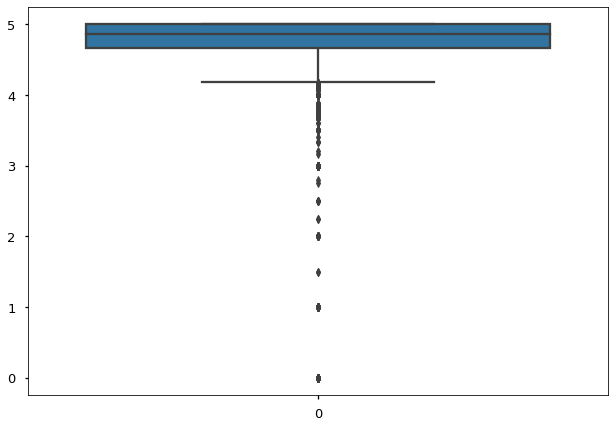

In [134]:
## Visualizing the pre-processed target values

sns.boxplot(data = df['review_scores_rating']);

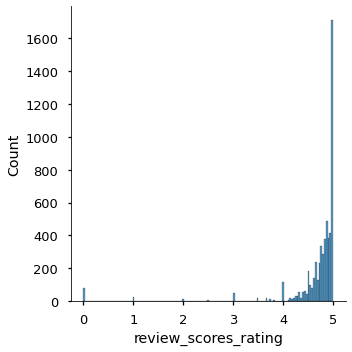

In [135]:
sns.displot(data=df['review_scores_rating']);

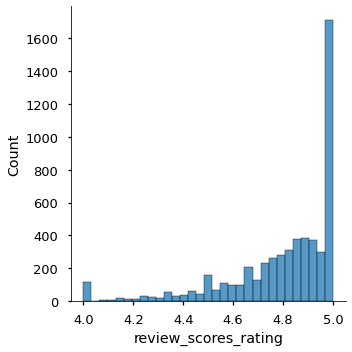

In [136]:
sns.displot(data=df['review_scores_rating'][df['review_scores_rating'] >= 4]);

In [137]:
## Calculating mean for target values
mean = df['review_scores_rating'].mean()
mean

4.683691540577699

In [138]:
## Calculating median for target values
median = df['review_scores_rating'].median()
median

4.86

---

>Based on this box plot and distributions, I see that **a large majority of the values are 4+, with a large number of values being 4.8+.**
>
>For the purposes of my classification (whether or not a given host would have a rating of 4+), I can fill the missing values with either the mean/median.
>
> **I will fill the missing values with the mean value of 4.68** to help ensure a fair representation of the overall data.

---

In [139]:
df['review_scores_rating'].fillna(median, inplace=True)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [140]:
cf.report_df(df)

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_since,object,2415,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,object,2,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,object,183,605,0.08,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,float64,57,0,0.00,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,float64,57,0,0.00,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,object,296,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,object,2,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,object,2,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,object,39,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
latitude,float64,5076,0,0.00,"7,897.00",38.91,0.02,38.82,38.90,38.91,38.92,39.00


---

> At this point, I addressed most of the missing values in my dataset by dropping columns and filling missing values. There are still a few columns with missing values, but I will use a SimpleImputer combined with a GridSearchCV to determine the best method by which to fill those values.
>
> Now I will review the remaining data and determine if there are any other issues with my data.

---

## ❌ 🔧 Changing DataTypes

In [186]:
## Reviewing the remaining dataframe
df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0


**COMMENT:** what next? 

* DONE: T/F columns to 1/0


* DONE: 'host_since' to DT


* DONE: 'price' -$, to float


* DONE: 'neighbourhood_cleansed' split on ", " and convert to binary columns, then drop host_neighbourhood


* 'bathrooms_text' split on space, keep 1st part, convert to int


* 'host_verifications' - single string, needs extensive work in order to MLB

### Converting True/False to 1/0

In [142]:
## Creating list of true/false features to convert to 1/0, respectively

t_f_xf = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
          'has_availability','instant_bookable']
t_f_xf

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [188]:
## Converting datatype to "string" to replace values

df[t_f_xf] = df[t_f_xf].astype('str')
df[t_f_xf].dtypes

host_is_superhost         object
host_has_profile_pic      object
host_identity_verified    object
has_availability          object
instant_bookable          object
dtype: object

In [212]:
## Converting t/f to 1/0, respectively

df.loc[:,t_f_xf].replace({ 't' : 1, 'f' : 0}, inplace=True)

In [185]:
## Verifying results

cf.report_df(df[t_f_xf])

,datatypes,num_unique,null_sum,null_pct,count,unique,top,freq
host_is_superhost,object,2,0,0.00,7897,2,f,5887
host_has_profile_pic,object,2,0,0.00,7897,2,t,7876
host_identity_verified,object,2,0,0.00,7897,2,t,6445
has_availability,object,2,0,0.00,7897,2,t,7643
instant_bookable,object,2,0,0.00,7897,2,f,4671


### Price -$, to Int

In [183]:
## Converting each value into a float for processing

try:
    df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')
    df['price'][0]
except Exception:
    print('\nValues are already processed and saved. No changes necessary')
    print(f"\nSample value: {df['price'][0]}")


Values are already processed and saved. No changes necessary

Sample value: 55.0


In [207]:
df['price'].describe()

count    7,897.00
mean       185.65
std        322.32
min          0.00
25%         80.00
50%        119.00
75%        187.00
max     10,000.00
Name: price, dtype: float64

### Host_Since to Datetime

In [189]:
df.head(2)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0


In [211]:
df.loc[:,'host_since'] = pd.to_datetime(df.loc[:,'host_since'])
df['host_since']

0      2008-11-26
1      2008-12-12
2      2008-12-30
3      2009-01-26
4      2009-01-13
          ...    
8028   2020-08-03
8029   2020-07-29
8030   2016-04-27
8031   2020-09-23
8032   2020-09-23
Name: host_since, Length: 7897, dtype: datetime64[ns]

In [209]:
df["host_since"].describe(datetime_is_numeric=True)

count                             7897
mean     2015-12-03 09:24:43.854665728
min                2008-11-21 00:00:00
25%                2014-04-06 00:00:00
50%                2015-10-15 00:00:00
75%                2017-04-21 00:00:00
max                2021-07-06 00:00:00
Name: host_since, dtype: object

### Host_Verifications

---

>Values are a single string and need broken up into usable pieces

---

In [169]:
# test3 = df['host_verifications'][0]
# test3[1:-1].replace('"', "'").split(",")

In [170]:
# # df['Tags'] = df.Tags.apply(lambda x: x[1:-1].split(','))

# df['host_verifications'].apply(lambda x: x.split(','))[0]

# ❌ TODO: Move MLB to preprocessor for neighbourhood_cleansed and Host_Verifications

### neighbourhood_cleansed

In [220]:
df.loc[:,'neighbourhood_cleansed'][1].split(', ')

['Edgewood', 'Bloomingdale', 'Truxton Circle', 'Eckington']

In [228]:
## Converting values into a list of strings for each neighborhood

try:
    df.loc[:,'neighbourhood_cleansed'] = df.loc[:,'neighbourhood_cleansed'] \
                                                .apply(lambda x: x.split(', '))
    display(df.loc[:,'neighbourhood_cleansed'])
except Exception:
    print('\nValues are already processed and saved. No changes necessary.')
    print(f"\nSample value: {df.loc[:,'neighbourhood_cleansed'][3]}")


Values are already processed and saved. No changes necessary

Sample value: ['Ivy City', 'Arboretum', 'Trinidad', 'Carver Langston']


---

> The following code snippet is adapted from [here](https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list#:~:text=Sparse%20solution%20(for%20Pandas%20v0.25.0%2B)) by the user [Maxu](https://stackoverflow.com/users/5741205/maxu).

---

In [241]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

try:
    df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('neighbourhood_cleansed')),
                              columns=mlb.classes_,index=df.index))
except Exception:
        print('\nValues are already processed and saved. No changes necessary.')


Values are already processed and saved. No changes necessary.


In [231]:
df.head()

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### bathrooms_text

In [248]:
df.loc[:,'bathrooms_text'].str.split(' ')[0]

['1', 'private', 'bath']

## 🎯 Inspecting the Target Variable

---

> The target feature, `'review_scores_rating'`, is currently a range of values from 0 to 5, with 6% of the scores being 4 or above. The `.value_counts()` results show a value sub-zero; this is for the purpose of binning the values; the lowest value is actually 0.00.
>
> Of the scores less than 4, a little under half are between 3 and 4 (rounded) and about a third are between 0 and 1 (rounded).
>
> For my classification modeling, my classes are slightly imbalanced between values less/greater than 4 with a 32/68 split. I may need to perform some over-sampling of the minority class to increase my model's performance.

---

# 🪓 **Train/Test Split**

---

> Before I run any further pre-processing, I split my data into training and test sets to allow me to test my model's performance.

---

In [ ]:
# ## Creating features/target for dataset
# target = 'review_scores_rating'

# X = df_cleaned.drop(columns = target).copy()
# y = df_cleaned[target].copy()

In [ ]:
# ## Confirming same number of rows
# X.shape[0] == y.shape[0]

In [ ]:
# ## Splitting to prevent data leakage
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 🚿 **Preprocessing Pipeline**

In [ ]:
# cat_cols = ['hotel', 'meal','arrival_date_month', 'country', 'market_segment',
#             'distribution_channel','is_repeated_guest','reserved_room_type',
#             'assigned_room_type','deposit_type', 'agent',
#             'customer_type','reservation_status']

# cont_cols = [col for col in X_train.drop(['reservation_status_date','company'],axis=1).columns if col not in cat_cols]

# cont_cols

In [ ]:
# X_train[cat_cols] = X_train[cat_cols].astype(str)

In [ ]:
# X_test[cat_cols] = X_test[cat_cols].astype(str)

In [ ]:
# ## Creating ColumnTransformer and sub-transformers for imputation and encoding

# # Filling missing "Children"
# zero_transformer = SimpleImputer(strategy='constant', fill_value=0)

# ##  
# missing_transformer = SimpleImputer(strategy='constant', fill_value='missing')

# ## Encoding categoricals - handling errors to prevent issues w/ test set
# categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# cat_pipe = Pipeline(steps=[('imputer', missing_transformer),
#                       ('ohe', categorical_transformer)])

# cont_pipe = Pipeline(steps=[('imputer', zero_transformer),
#                            ('scaler', StandardScaler())])

# ## Instantiating the ColumnTransformer and including all transformers
# preprocessor = ColumnTransformer(
#     transformers=[('conts', cont_pipe, cont_cols),
#                   ('cats', cat_pipe, cat_cols)])

# preprocessor

In [ ]:
# preprocessor.fit(X_train)

# ## Getting feature names from OHE
# ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

In [ ]:
# ## Generating list for column index
# final_cols = [*cont_cols, *ohe_cat_names]

# ## Fit and transform the data via the ColumnTransformer
# X_train_tf = preprocessor.transform(X_train)
# X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

# ## Transforming the test set and saving
# X_test_tf = preprocessor.transform(X_test)
# X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

# display(X_train_tf_df.head(5),X_test_tf_df.head(5))

# 📝 Next Steps

* Process classification model - i.e. Logreg, KNN, DecisionTrees, etc.
* Evaluate results
* Determine if I need to redo pre-processing steps

# 🚿 Classification Pipeline